In [1]:
!pip install transformers datasets accelerate peft bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from huggingface_hub import login


hf_token = "Your hugging face token"
login(token=hf_token)


In [3]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig


model_name = "EleutherAI/gpt-neo-125M"

# Check if a CUDA GPU is available.
device = "cuda" if torch.cuda.is_available() else "cpu"

# If CUDA is available, set up 8-bit quantization using BitsAndBytesConfig.
quantization_config = BitsAndBytesConfig(load_in_8bit=True) if device == "cuda" else None


device_map = "auto" if device == "cuda" else None

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    token=hf_token,
    device_map=device_map,
    quantization_config=quantization_config  # This replaces load_in_8bit argument.
)

tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    token=hf_token,
    padding_side="left"  # adjust as necessary.
)

# If the tokenizer has no pad token, set it to the EOS token.
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

print("Model and tokenizer loaded successfully on device:", device)


config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

Model and tokenizer loaded successfully on device: cuda


In [4]:
from datasets import load_dataset

# Load the CNN/DailyMail dataset (version 3.0.0) for summarization.
dataset = load_dataset("cnn_dailymail", "3.0.0", split="train[:1%]")  # 1% for quick testing
print(dataset[0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [5]:
# Define maximum lengths for the prompt and the summary.
max_prompt_length = 512      # maximum tokens for the article prompt
max_summary_length = 128     # maximum tokens for the summary
max_total_length = max_prompt_length + max_summary_length  # total sequence length

def preprocess_function(example):
    # Create a prompt instructing the model to summarize.
    prompt = "summarize: " + example["article"]
    summary = example["highlights"]

    # Concatenate prompt and summary with a newline as a separator.
    full_input = prompt + "\n" + summary

    # Tokenize the entire text (prompt + summary).
    tokenized = tokenizer(
        full_input,
        truncation=True,
        max_length=max_total_length,
        padding="max_length"
    )

    # Tokenize the prompt separately to determine its length.
    tokenized_prompt = tokenizer(
        prompt,
        truncation=True,
        max_length=max_prompt_length,
        padding=False
    )
    prompt_length = len(tokenized_prompt["input_ids"])

    # Create labels: copy the input_ids and mask the prompt portion.
    labels = tokenized["input_ids"].copy()
    # Set labels for the prompt tokens to -100 so that loss is computed only on summary tokens.
    labels[:prompt_length] = [-100] * prompt_length

    tokenized["labels"] = labels
    return tokenized

# Preprocess the dataset.
tokenized_dataset = dataset.map(preprocess_function, batched=False)
print(tokenized_dataset[0])



Map:   0%|          | 0/2871 [00:00<?, ? examples/s]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [6]:
from peft import LoraConfig, get_peft_model

# Configure LoRA parameters.
lora_config = LoraConfig(
    r=8,                    # LoRA rank.
    lora_alpha=32,          # Scaling factor.
    target_modules=["q_proj", "v_proj"],  # These modules are common in causal models; adjust if needed.
    lora_dropout=0.1,
    bias="none",
    task_type="CAUSAL_LM"
)

# Wrap the model with PEFT.
model = get_peft_model(model, lora_config)
print("PEFT configuration applied.")


PEFT configuration applied.


In [7]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./gpt-neo-summarizer-finetuned",  # Directory to save the model.
    per_device_train_batch_size=2,                # Adjust based on your GPU capacity.
    gradient_accumulation_steps=8,                  # Simulate a larger batch size.
    num_train_epochs=1,                           # Set higher for full training.
    learning_rate=2e-4,
    fp16=True,                                    # Use mixed precision if supported.
    logging_steps=10,
    save_steps=50,
    push_to_hub=False                             # Change to True to push your model to HF Hub.
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
)


No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [9]:
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rana-23bai10186 (rana-23bai10186-vellore-institute-of-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Step,Training Loss
10,390.274300
20,5936.919500
30,339.176400
40,1324.685000
50,3829.639100
60,464.663200
70,3700.179300
80,469.632900
90,1253.742800
100,241.878400


/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


TrainOutput(global_step=179, training_loss=1391.1084352631808, metrics={'train_runtime': 336.8425, 'train_samples_per_second': 8.523, 'train_steps_per_second': 0.531, 'total_flos': 938364779888640.0, 'train_loss': 1391.1084352631808, 'epoch': 0.9972144846796658})

In [13]:
from google.colab import drive


drive.mount('/content/drive')


save_path = "/content/drive/MyDrive/gpt-neo-summarizer-finetuned"

model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print("Model and tokenizer saved to", save_path)



Mounted at /content/drive
Model and tokenizer saved to /content/drive/MyDrive/gpt-neo-summarizer-finetuned


In [19]:

article_text = """
Once upon a time, in a sparkling blue ocean, there lived a little green turtle named Tiko. Tiko was the smallest turtle in his family, and sometimes, the other sea creatures teased him for being slow and tiny.

One day, while exploring near the coral reef, Tiko heard a faint cry for help. It was a baby seahorse, tangled in a fishing net! The other fish swam away, afraid of getting stuck too, but Tiko knew he had to act fast.

Even though he was small, Tiko had sharp little teeth. He nibbled and gnawed at the net until—SNAP!—the seahorse was free!

"Thank you, Tiko!" the seahorse cheered. "You’re the bravest turtle I know!"

Word spread quickly, and soon, all the sea creatures praised Tiko for his courage. From that day on, no one teased him for being small—because they knew even the tiniest heroes could do the biggest things!
"""

# Define a clear prompt with a delimiter "Summary:" to instruct the model.
prompt = "Summarize the following article:\n" + article_text + "\nSummary:\n"

# Tokenize the prompt. Adjust max_length as necessary (here 512 tokens).
inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)
inputs = {k: v.to(model.device) for k, v in inputs.items()}

# Generate the summary using beam search with tuned parameters.
output_tokens = model.generate(
    **inputs,
    max_length=1000,             # Maximum length of the generated text.
    num_beams=4,                # Beam search with 4 beams.
    no_repeat_ngram_size=2,     # Prevent repeated phrases.
    early_stopping=True         # Stop when the model deems the summary complete.
)

# Decode the generated tokens into text.
generated_text = tokenizer.decode(output_tokens[0], skip_special_tokens=True)

# Extract the summary text by splitting on the delimiter "Summary:".
if "Summary:" in generated_text:
    summary_text = generated_text.split("Summary:")[-1].strip()
else:
    summary_text = generated_text.strip()

# Print the original article and the summary separated by a dashed line.
print("Input Article:")
print(article_text)
print("\n" + "-"*50 + "\n")
print("Generated Summary:")
print(summary_text)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input Article:

Once upon a time, in a sparkling blue ocean, there lived a little green turtle named Tiko. Tiko was the smallest turtle in his family, and sometimes, the other sea creatures teased him for being slow and tiny.

One day, while exploring near the coral reef, Tiko heard a faint cry for help. It was a baby seahorse, tangled in a fishing net! The other fish swam away, afraid of getting stuck too, but Tiko knew he had to act fast.

Even though he was small, Tiko had sharp little teeth. He nibbled and gnawed at the net until—SNAP!—the seahorse was free!

"Thank you, Tiko!" the seahorse cheered. "You’re the bravest turtle I know!"

Word spread quickly, and soon, all the sea creatures praised Tiko for his courage. From that day on, no one teased him for being small—because they knew even the tiniest heroes could do the biggest things!


--------------------------------------------------

Generated Summary:
Tiko is a tiny, tiny turtle, about the size of a small fish. The only thi

In [20]:
!pip install rouge_score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=6e229445324122ef0366763ccab132925cbf6cbafb832dc60aaee4bb8a4c0cac
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [21]:
import evaluate
import matplotlib.pyplot as plt
import numpy as np


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

ROUGE scores: {'rouge1': np.float64(0.13334047753104078), 'rouge2': np.float64(0.06497424484122566), 'rougeL': np.float64(0.09318259037340226), 'rougeLsum': np.float64(0.11138361110665249)}


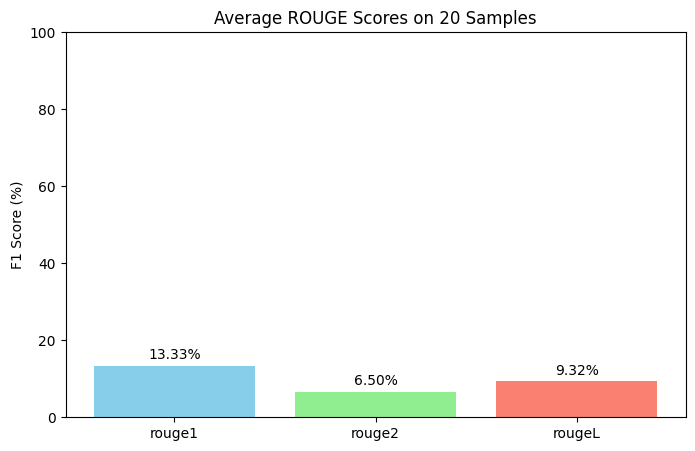

In [25]:


import evaluate
import matplotlib.pyplot as plt


rouge_metric = evaluate.load("rouge")

# Define the number of samples to evaluate (e.g., 20 examples).
n_samples = 20
generated_summaries = []
reference_summaries = []

# Loop over the first n_samples in the dataset.
for i in range(n_samples):
    sample = dataset[i]
    # Prepare the prompt for the model.
    prompt = "summarize: " + sample["article"]
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)
    # Ensure the inputs are on the same device as the model.
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    # Generate the summary.
    # Use max_new_tokens to allow generation beyond the input length.
    output_tokens = model.generate(
        **inputs,
        max_new_tokens=128,         # Generate up to 128 new tokens.
        num_beams=4,                # Use beam search with 4 beams for more focused output.
        no_repeat_ngram_size=2,     # Prevent repeated phrases.
        early_stopping=True         # Stop when the model considers the summary complete.
    )

    # Decode the generated tokens into text.
    generated_summary = tokenizer.decode(output_tokens[0], skip_special_tokens=True)
    generated_summaries.append(generated_summary)
    reference_summaries.append(sample["highlights"])

# Compute ROUGE scores comparing generated summaries to the reference summaries.
results = rouge_metric.compute(predictions=generated_summaries, references=reference_summaries)
print("ROUGE scores:", results)

# Prepare data for plotting.
rouge_keys = ["rouge1", "rouge2", "rougeL"]
# Access F1 scores directly as floats.
scores = [results[key] * 100 for key in rouge_keys]  # Convert scores to percentages.

# Plot the ROUGE F1 scores.
plt.figure(figsize=(8, 5))
bars = plt.bar(rouge_keys, scores, color=["skyblue", "lightgreen", "salmon"])
plt.ylim(0, 100)
plt.ylabel("F1 Score (%)")
plt.title(f"Average ROUGE Scores on {n_samples} Samples")
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f"{score:.2f}%", ha='center', va='bottom')
plt.show()
